# **Providing data-driven suggestions for HR**

## Description and deliverables

The project stands for the purpose of analyzing the data and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, we'll have artifacts that would be able to present to the HR department. A complete code notebook provided here which uses a regression model and machine learning model to predict whether or not an employee will leave the company. The project shows both approaches, with keeping in mond the data leakage issue.

In deliverables, we'll include the model evaluation (and interpretation if applicable), a data visualization(s) of choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

The goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

### Familiarizing with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Imports

### Import packages

In [1]:
# Import packages
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import sklearn.metrics as metrics
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

In [2]:
# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

In [3]:
from sklearn import set_config
set_config(display='diagram')

In [4]:
import sklearn
print(sklearn.__version__)

1.3.1


### Load dataset

In [5]:
# Load dataset into a dataframe
df0 = pd.read_csv("Datasets/HR_capstone_dataset.csv")

# Display first few rows of the dataframe
df0.sample(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
6632,0.95,0.74,3,139,2,0,0,0,IT,medium
13606,0.54,0.79,5,249,3,1,0,0,management,high
2599,0.48,0.89,5,179,3,0,0,0,management,medium
6642,0.51,0.76,2,239,3,0,0,0,support,high
8841,0.57,0.61,3,112,5,0,0,0,IT,medium


## Data Exploration (Initial EDA and data cleaning)

### Gather basic information about the data

In [6]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gathering descriptive statistics

In [7]:
# Gather descriptive statistics about the data
df0.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [8]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [9]:
# Rename columns as needed
df0.columns = ['satisfaction_level', 'last_evaluation', 'number_project',
               'average_monthly_hours', 'tenure', 'work_accident', 'left',
               'promotion_last_5years', 'department', 'salary']


# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

In [10]:
# Check for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

In [11]:
# Check for duplicates
df0.duplicated().sum()

3008

In [12]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [13]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
df.sample(5)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
2263,0.91,0.97,3,167,2,0,0,0,support,low
11038,0.61,0.52,3,224,3,0,0,0,hr,low
7394,0.88,0.55,4,205,4,0,0,0,product_mng,low
234,0.48,0.57,4,270,4,0,1,0,technical,low
5710,0.94,0.53,4,183,3,0,0,0,IT,medium


### Check outliers

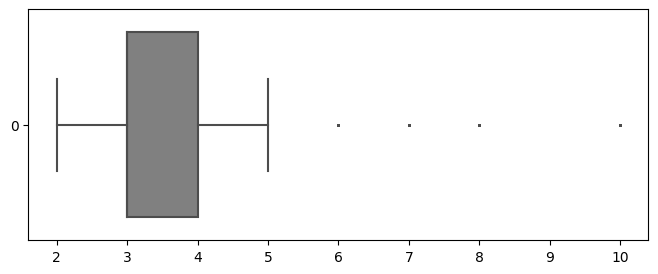

In [14]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(8, 3))
sns.boxplot(df['tenure'], fliersize=1, color='grey', orient='h')
plt.show();

In [15]:
# Determine the number of rows containing outliers
iqr = df['tenure'].quantile(0.75) - df['tenure'].quantile(0.25)

lower_outliers = df['tenure'].quantile(0.25) - 1.5*iqr
upper_outliers = df['tenure'].quantile(0.75) + 1.5*iqr

print(f'Lower-limit: {lower_outliers} \nUpper-limit: {upper_outliers}')

outliers = df[(df['tenure'] < lower_outliers) | (df['tenure'] > upper_outliers)]

print(f'# of outliers: {outliers.shape[0]}')
outliers.head()

Lower-limit: 1.5 
Upper-limit: 5.5
# of outliers: 824


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
1,0.80,0.86,5,262,6,0,1,0,sales,medium
17,0.78,0.99,4,255,6,0,1,0,sales,low
34,0.84,0.87,4,246,6,0,1,0,hr,low
47,0.57,0.70,3,273,6,0,1,0,support,low
67,0.90,0.98,4,264,6,0,1,0,product_mng,medium


Certain types of models are more sensitive to outliers than others. When building ML model, consider whether to remove outliers, based on the type of model you decide to use.

## Visualization &  Data Exploration | EDA Continuation

In [16]:
# Get numbers of people who left vs. stayed
print(f"# of employees left/stayed:")
print(df['left'].value_counts())

# Get percentages of people who left vs. stayed
print(f"# of employees left/stayed:")
print(df['left'].value_counts(normalize=True))

# of employees left/stayed:
left
0    10000
1     1991
Name: count, dtype: int64
# of employees left/stayed:
left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


### Data visualizations

In [17]:
df.sample(5)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
5285,0.57,0.39,3,193,6,0,0,0,sales,medium
1691,0.39,0.56,2,160,3,0,1,0,sales,low
7098,0.21,0.60,5,151,6,0,0,0,RandD,medium
3306,0.63,0.64,4,212,4,0,0,0,sales,medium
10729,0.68,0.78,5,233,3,0,0,0,technical,high


Average monthly hours, given that an average work week is of 40 hours & two week vacations are granted to each employee per year;

Then avg hrs per mo. (Monday - Friday) = `50 weeks * 40 hours per week / 12 months = 166.67 hours per month`

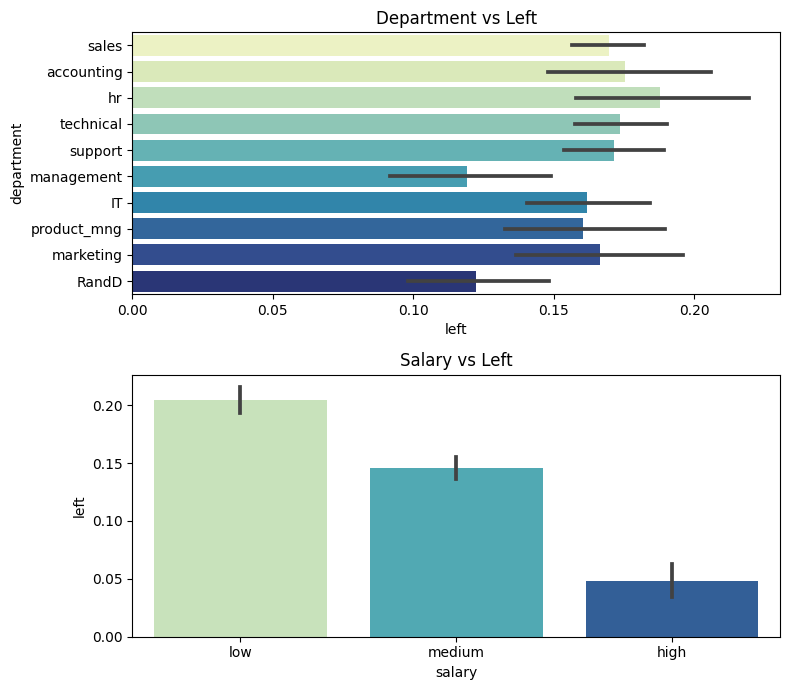

In [18]:
fig, axes = plt.subplots(2, 1, figsize=(8, 7))

# Plotting to figure the employees left according to 'Department';
sns.barplot(data=df, x='left', y='department', palette='YlGnBu', ax=axes[0])
axes[0].set_title('Department vs Left')

# Employees leaving by Salary;
sns.barplot(data=df, x='salary', y='left', palette='YlGnBu', ax=axes[1])
axes[1].set_title('Salary vs Left')

plt.tight_layout();

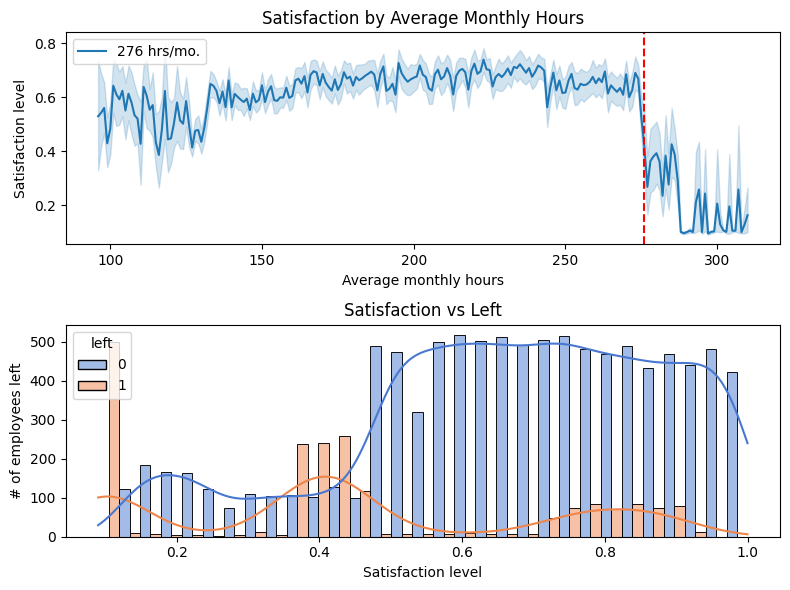

In [19]:

fig, axes = plt.subplots(2, 1, figsize=(8, 6))

sns.lineplot(data=df, x='average_monthly_hours', y='satisfaction_level', ax=axes[0])
axes[0].axvline(276, color='red', linestyle='--')
axes[0].set_title('Satisfaction by Average Monthly Hours')
axes[0].set_xlabel('Average monthly hours')
axes[0].set_ylabel('Satisfaction level')
axes[0].legend(labels=['276 hrs/mo.'])

sns.histplot(data=df, x='satisfaction_level', hue='left', kde=True, multiple='dodge', ax=axes[1], palette='muted')
# axes[1].axhline(0.4, color='red', linestyle='--')
axes[1].set_title('Satisfaction vs Left')
axes[1].set_xlabel('Satisfaction level')
axes[1].set_ylabel('# of employees left')

plt.tight_layout();

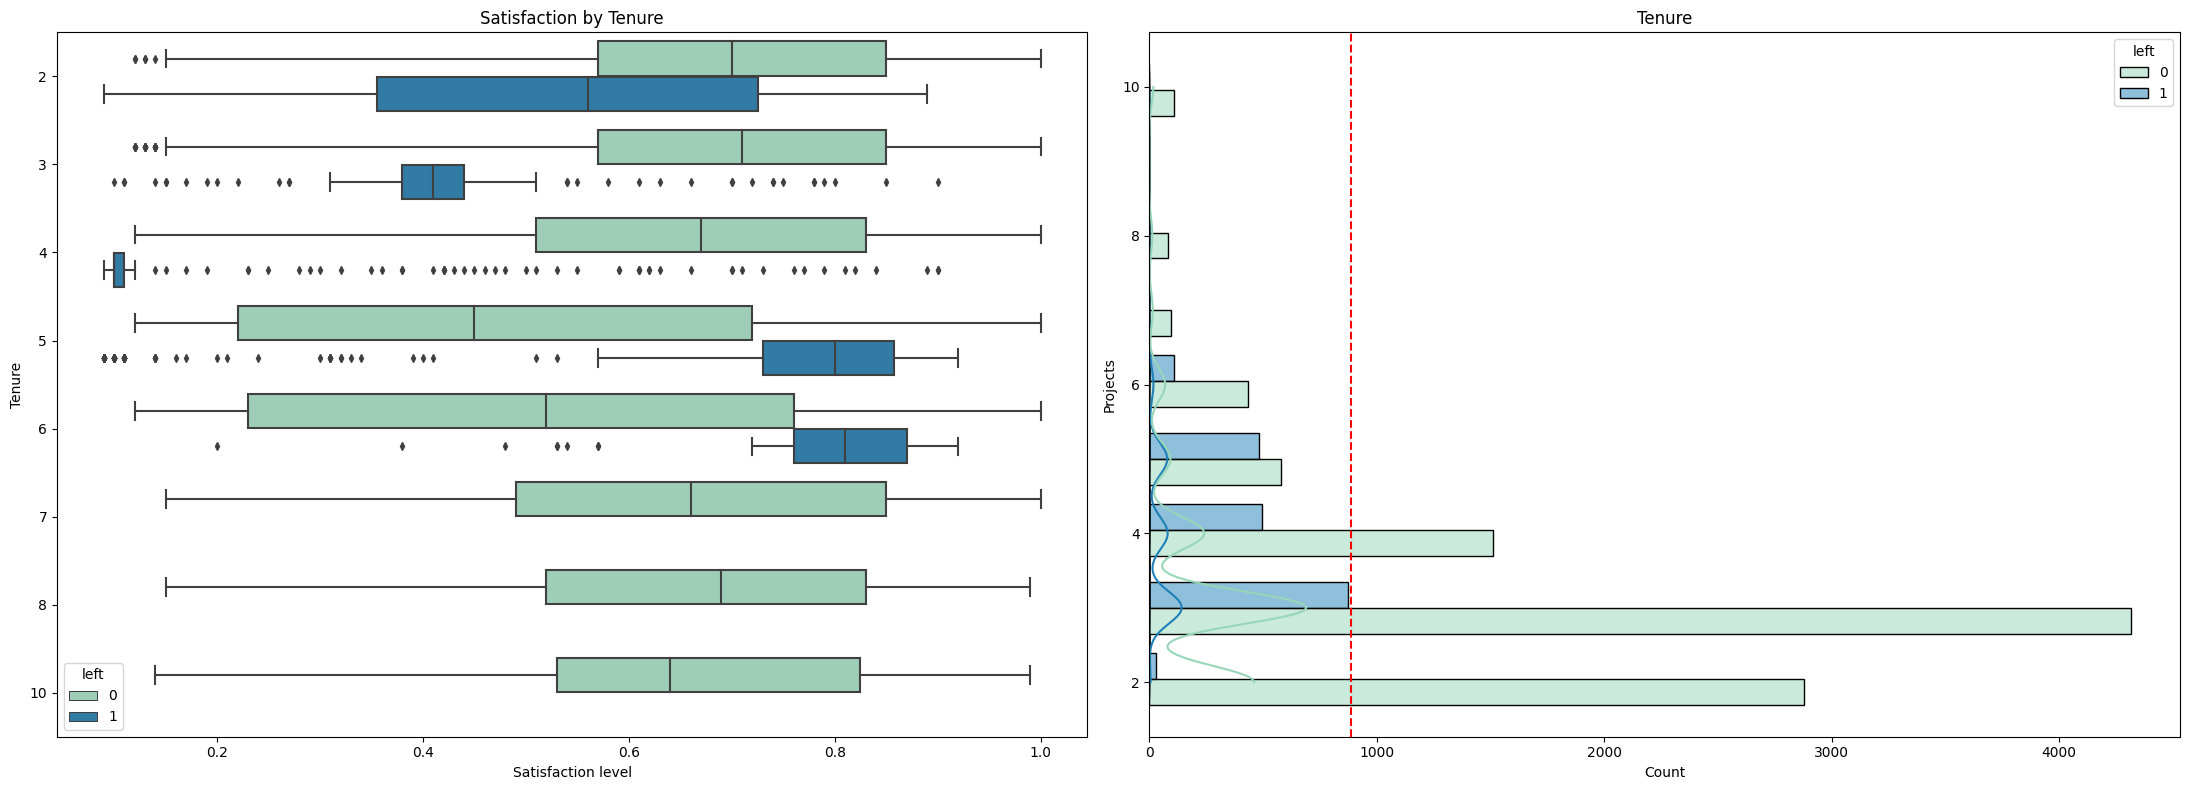

In [20]:
# Create a plot as needed
fig, axes = plt.subplots(1, 2, figsize=(22, 8))

sns.boxplot(data=df, x='satisfaction_level', y='tenure', hue='left', orient='h', fliersize=4, palette='YlGnBu', ax=axes[0])
axes[0].set_title('Satisfaction by Tenure')
axes[0].set_xlabel('Satisfaction level')
axes[0].set_ylabel('Tenure')

sns.histplot(data=df, y='tenure', hue='left', kde=True, multiple='dodge', shrink=8, palette='YlGnBu', ax=axes[1])
axes[1].axvline(885, linestyle='--', color='red')
axes[1].set_title('Tenure')
axes[1].set_ylabel('Projects')

plt.tight_layout();

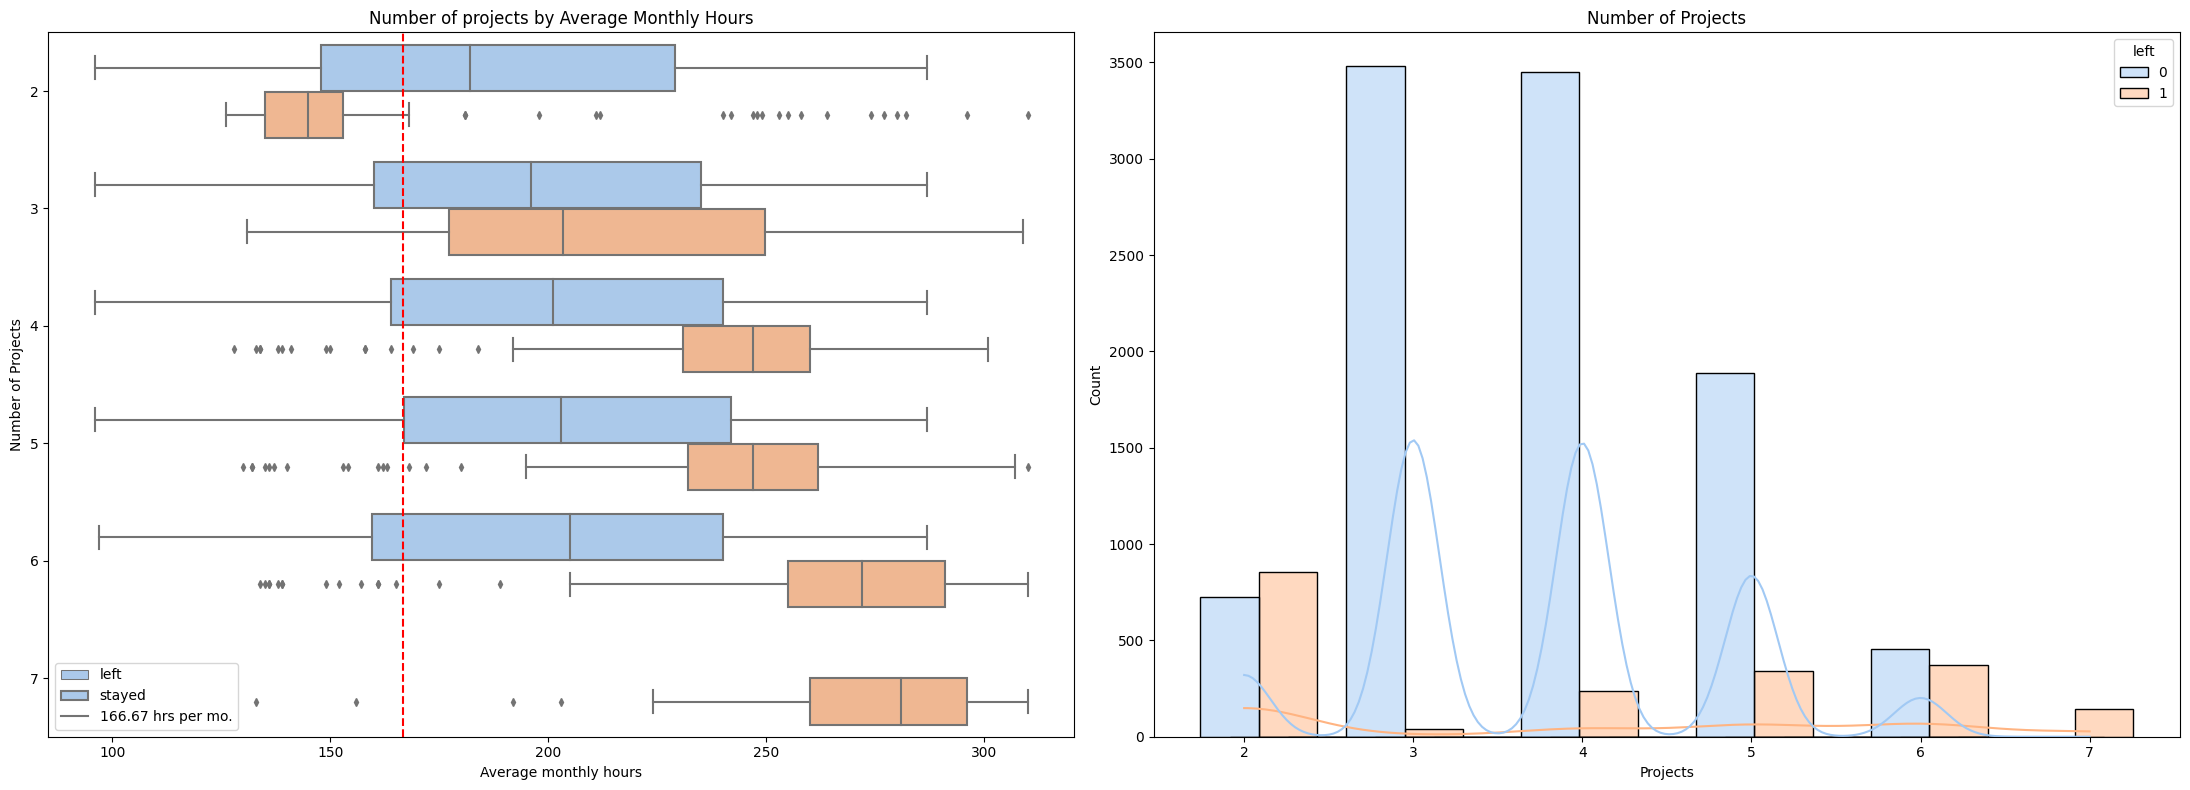

In [21]:
# Create a plot as needed
fig, axes = plt.subplots(1, 2, figsize=(22, 8))

sns.boxplot(data=df, x='average_monthly_hours', y='number_project', hue='left', 
            orient='h', fliersize=4, palette='pastel', 
            ax=axes[0])
axes[0].axvline(166.7, color='red', ls='--')
axes[0].legend(labels=['left', 'stayed', '166.67 hrs per mo.'])
axes[0].set_title('Number of projects by Average Monthly Hours')
axes[0].set_xlabel('Average monthly hours')
axes[0].set_ylabel('Number of Projects')

sns.histplot(data=df, x='number_project', hue='left', kde=True, multiple='dodge', shrink=4, palette='pastel', ax=axes[1])
# axes[1].axvline(885, linestyle='--', color='red')
axes[1].set_title('Number of Projects')
axes[1].set_xlabel('Projects')

plt.tight_layout();

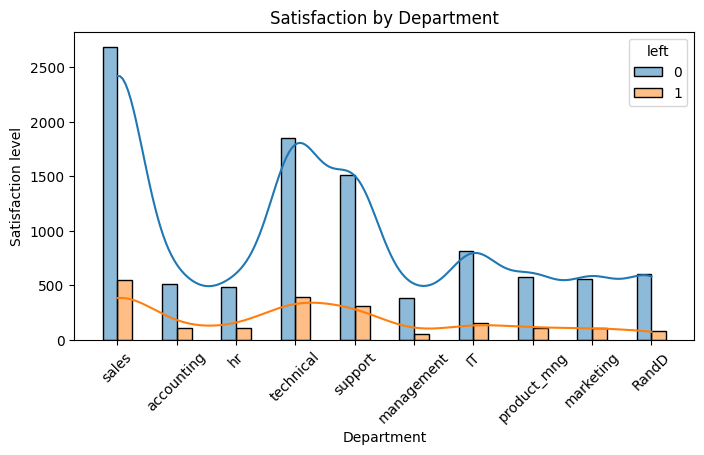

In [22]:
# Create a plot as needed
plt.figure(figsize=(8, 4))

sns.histplot(data=df, x='department', hue='left', kde=True, multiple='dodge', shrink=0.5) # type: ignore
plt.xticks(rotation=45)
plt.title('Satisfaction by Department')
plt.xlabel('Department')
plt.ylabel('Satisfaction level')

plt.show();

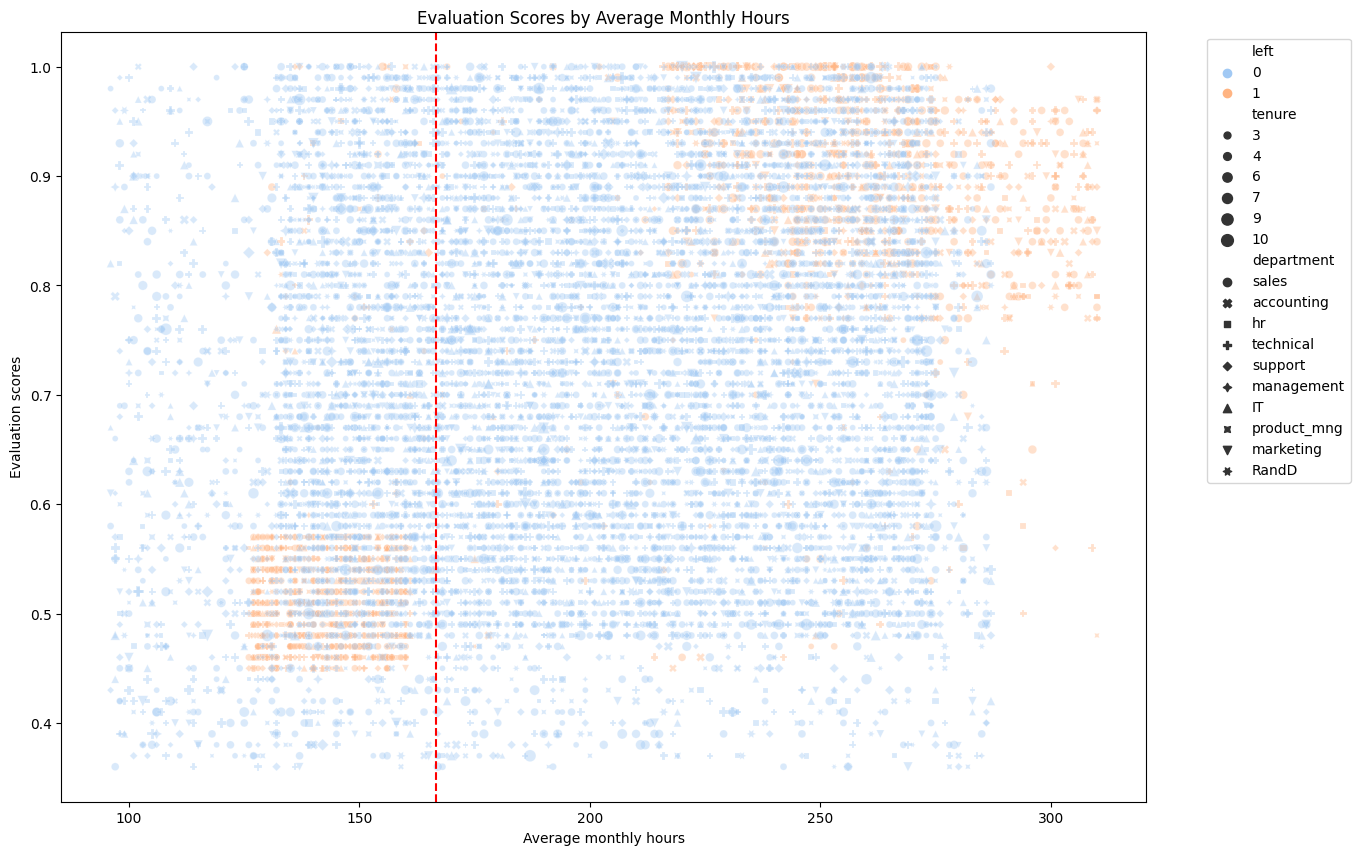

In [23]:
# Create a plot as needed
plt.figure(figsize=(14, 10))
sns.scatterplot(data=df, x='average_monthly_hours', y='last_evaluation', 
                hue='left', palette='pastel', 
                size='tenure', 
                style='department', alpha=0.4)
plt.xlabel('Average monthly hours')
plt.ylabel('Evaluation scores')
plt.title('Evaluation Scores by Average Monthly Hours')
plt.axvline(166.7, ls='--', color='red')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

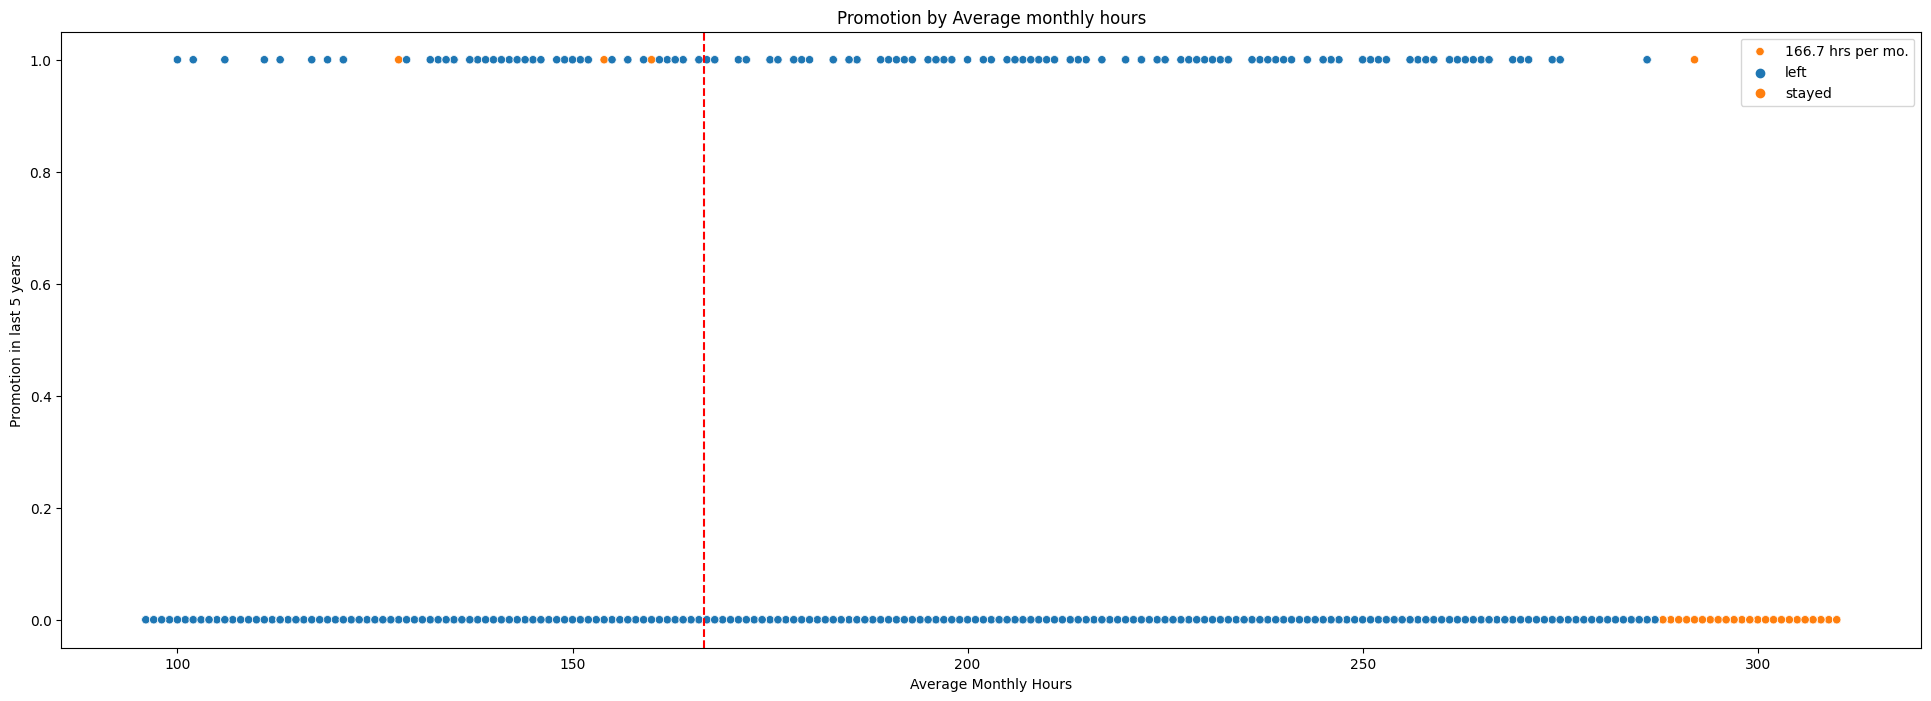

In [24]:
# Create a plot as needed
plt.figure(figsize=(24, 8))
sns.scatterplot(data=df, x='average_monthly_hours', y='promotion_last_5years', hue='left')
plt.axvline(166.7, ls='--', color='red')
plt.legend(labels=['166.7 hrs per mo.', 'left', 'stayed'])
plt.xlabel('Average Monthly Hours')
plt.ylabel('Promotion in last 5 years')
plt.title('Promotion by Average monthly hours')
plt.show();

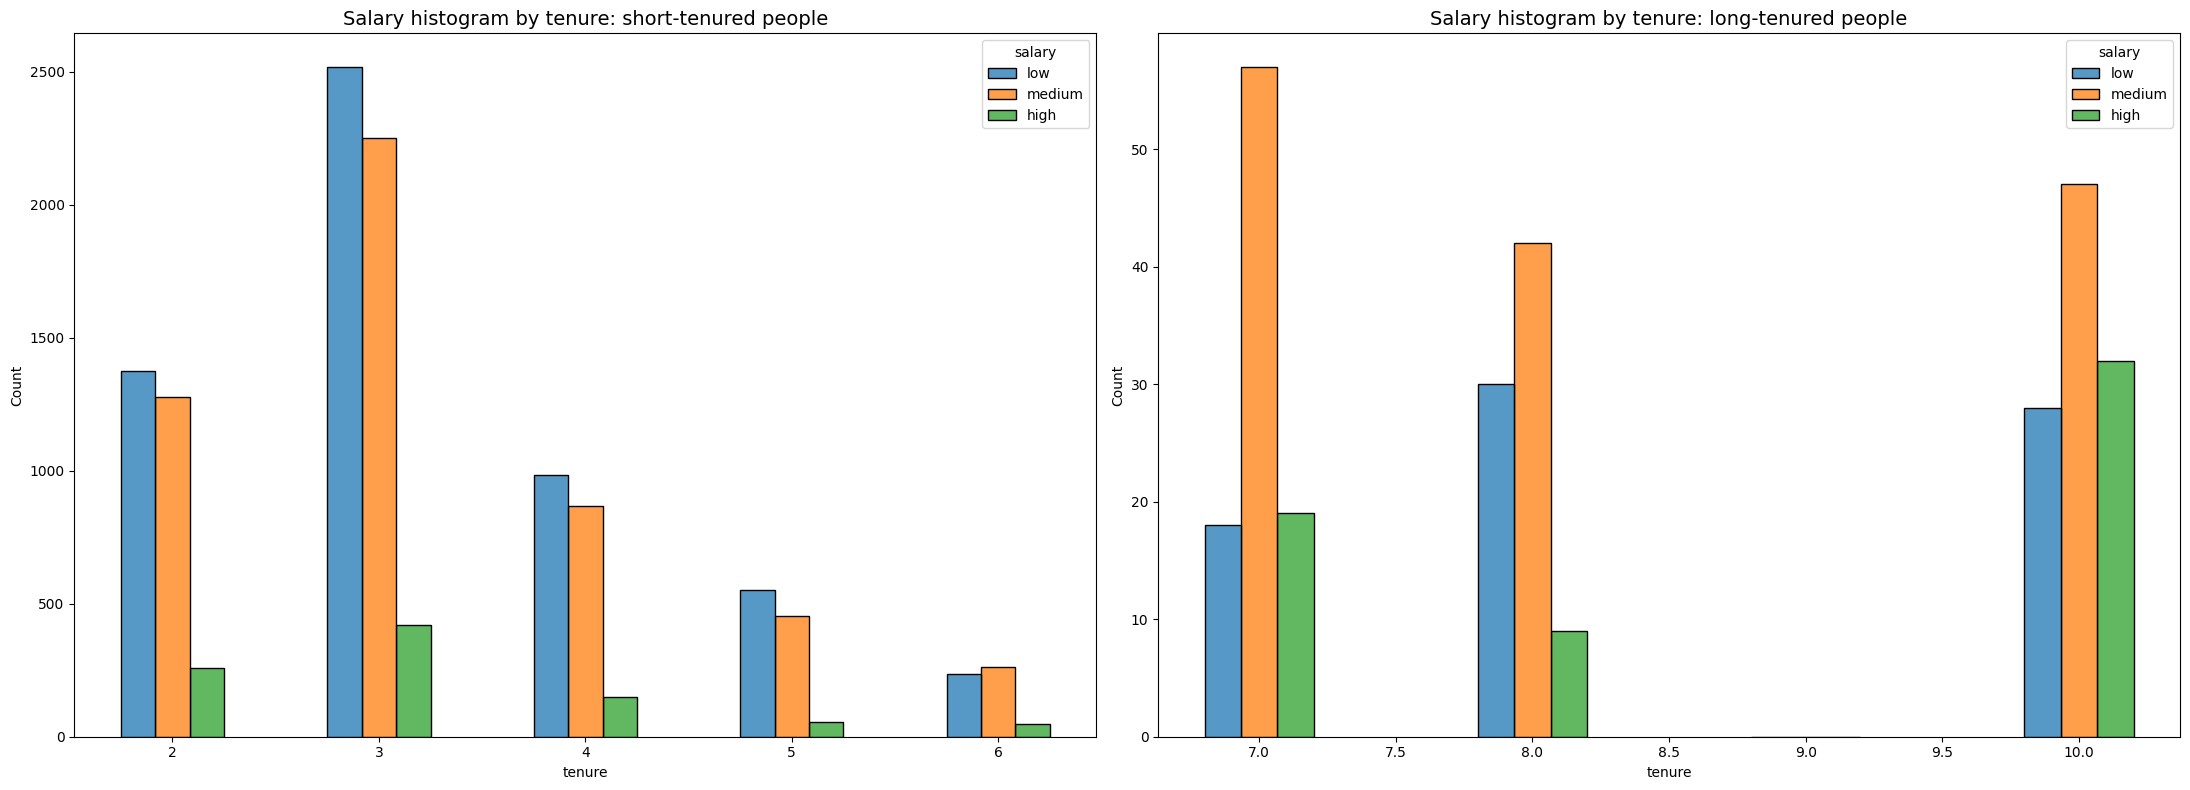

In [25]:
# Create a plot as needed
tenure_short = df[df['tenure'] < 7]
tenure_long = df[df['tenure'] > 6]

fig, ax = plt.subplots(1, 2, figsize = (22,8))
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=0.5, ax=ax[0]) # type: ignore
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=0.4, ax=ax[1]) # type: ignore
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14')
plt.tight_layout();

<Figure size 1600x900 with 0 Axes>

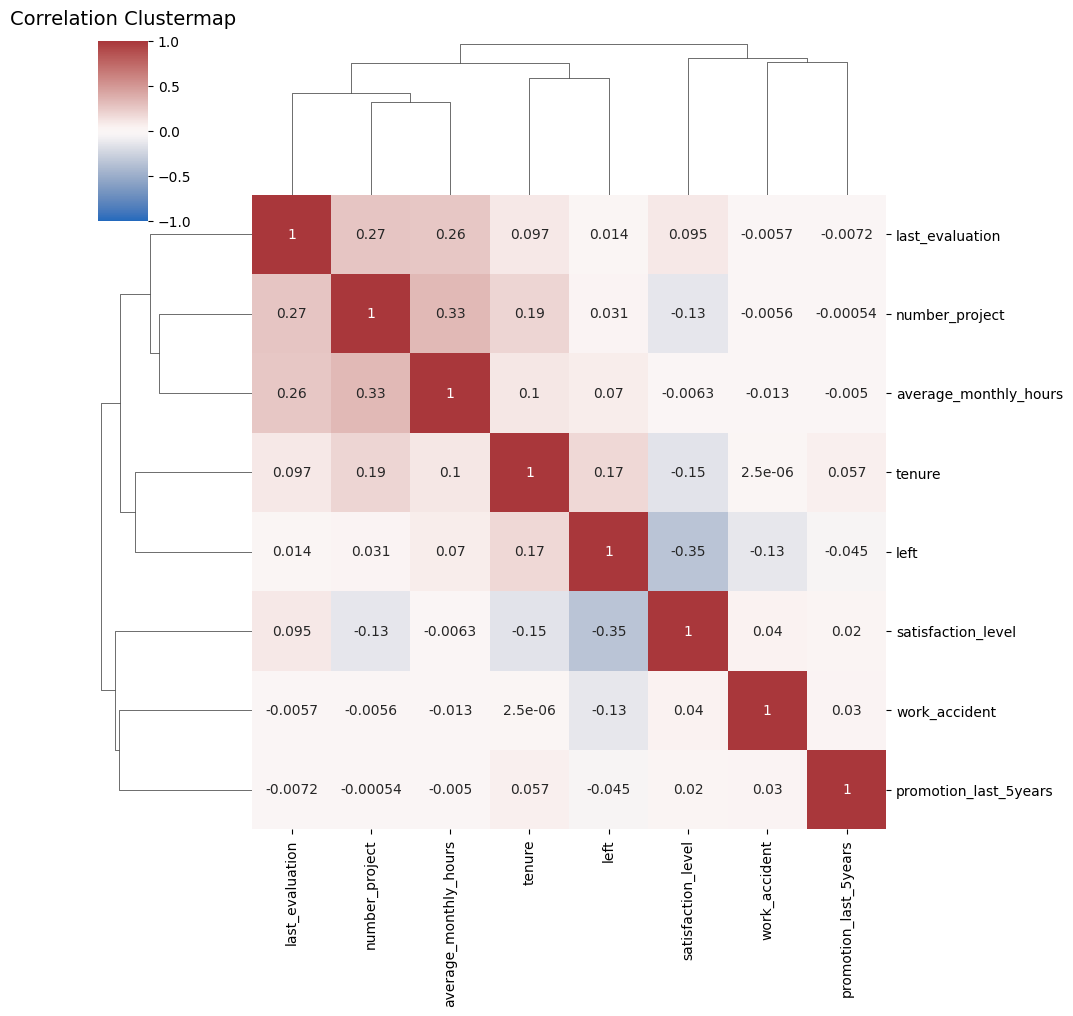

In [26]:
plt.figure(figsize=(16, 9))
sns.clustermap(df.corr(numeric_only=True), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
plt.title('Correlation Clustermap', fontdict={'fontsize':14}, pad=12)
plt.show();

### Insights

It appears that employees are leaving the company as a result of poor management. Leaving is tied to longer working hours, many projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There's a sizeable group of employees at this company who are probably burned out. It also appears that if an employee has spent more than six years at the company, they tend not to leave.

## Regression

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





In [27]:
df.corr(numeric_only=True)['left']

satisfaction_level      -0.350558
last_evaluation          0.013520
number_project           0.030928
average_monthly_hours    0.070409
tenure                   0.173295
work_accident           -0.125436
left                     1.000000
promotion_last_5years   -0.044657
Name: left, dtype: float64

In [46]:
# Handiling outliers, replacing outlier values with 95th percetile;
df.loc[(df['tenure'] < lower_outliers) | (df['tenure'] > upper_outliers), 'tenure'] = df['tenure'].quantile(.95)

# Verifying if the values were designated;
print(f'Maximum tenure of an employee: {df.tenure.max()}')

Maximum tenure of an employee: 6


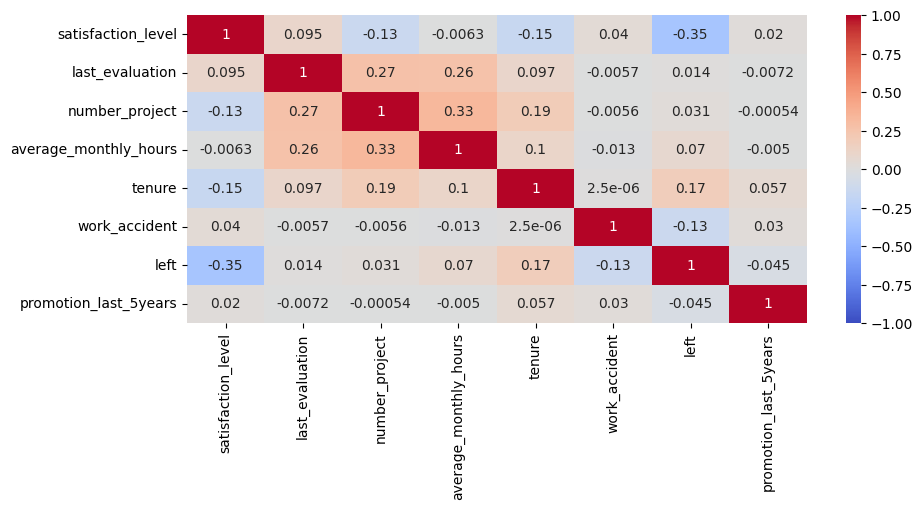

In [28]:
plt.figure(figsize=(10, 4))

sns.heatmap(df.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, cmap='coolwarm')
plt.show();

In [29]:
# Checking for class imbalance;
print('Proportion of classes in target variable (in %):')
print(round(df.left.value_counts(normalize=True)*100, 2))

Proportion of classes in target variable (in %):
left
0    83.4
1    16.6
Name: proportion, dtype: float64


In [30]:
# Isolating features & target variables;
X = df.drop(['left', 'number_project'], axis=1)
y = df['left']

In [31]:
# Spliting data into train and test set;
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,  random_state=42)

In [32]:
# Encoding salary feature/variable ordinally ;
# Could also be done using sklearn.preprocessing.OrdinallyEncoder();

x_train.salary =  x_train['salary'].replace({'low': 0, 'medium': 1, 'high': 2})
x_test.salary =  x_test['salary'].replace({'low': 0, 'medium': 1, 'high': 2})

In [33]:
enc = OneHotEncoder(drop='first', sparse_output=False)

x_train = enc.fit_transform(x_train)
x_test = enc.transform(x_test)

In [34]:
clf0 = LogisticRegression()

In [35]:
%%time

clf0.fit(x_train, y_train)

CPU times: total: 453 ms
Wall time: 525 ms


LogisticRegression()

In [36]:
reg_pred = clf0.predict(x_test)

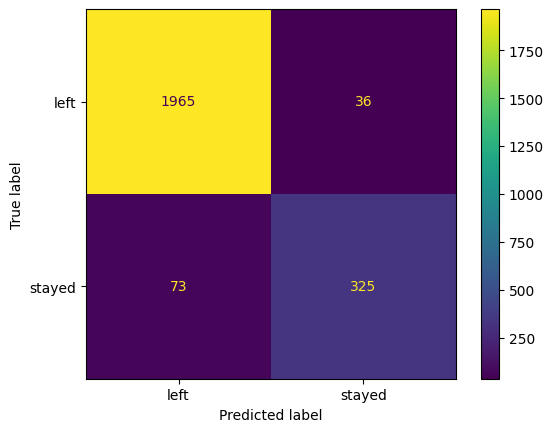

In [37]:
ConfusionMatrixDisplay(confusion_matrix(y_test, reg_pred), display_labels=['left', 'stayed']).plot();

In [39]:
print(classification_report(y_test, reg_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2001
           1       0.90      0.82      0.86       398

    accuracy                           0.95      2399
   macro avg       0.93      0.90      0.91      2399
weighted avg       0.95      0.95      0.95      2399



## Model Building | Results and Evaluation

### Identify the type of prediction task.

Supervised binary-classification task

### Identify the types of models most appropriate for this task.

Logistic Regression, Decision Tree Classifier, Random Forest Classifier, XG Boost Classifier, Naive Bayes

### Featuring Engineering

In [118]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [119]:
df.loc[(df['tenure'] < lower_outliers) | (df['tenure'] > upper_outliers), 'tenure'] = df['tenure'].quantile(.95)

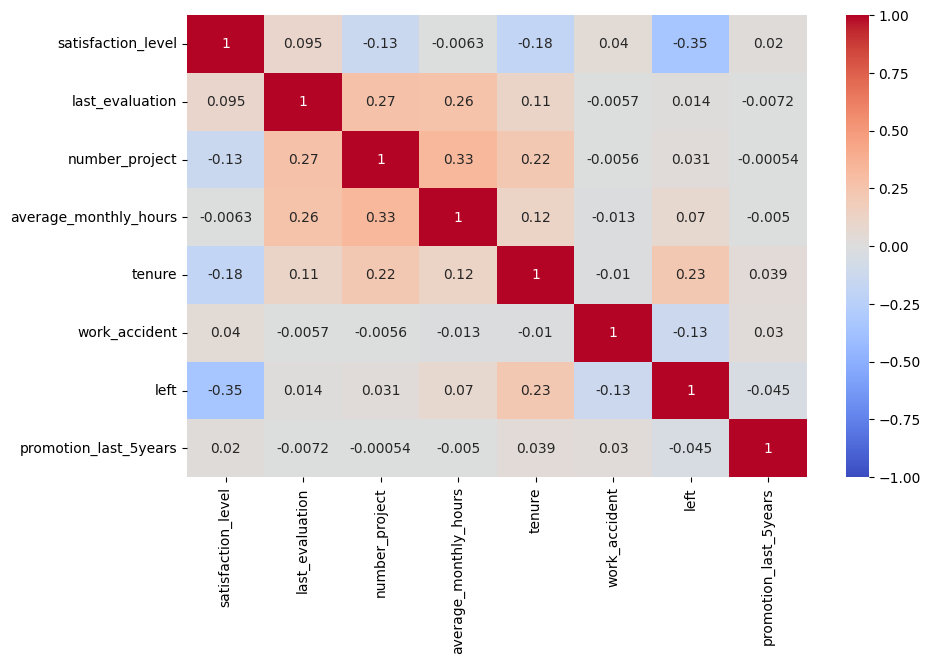

In [120]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show();

In [121]:
df['avg_hours_per_project'] = round(df['average_monthly_hours']/df['number_project'], 2)

C:\Users\Kaushal\AppData\Local\Temp\ipykernel_2612\4252578172.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avg_hours_per_project'] = round(df['average_monthly_hours']/df['number_project'], 2)


In [146]:
df = df[['satisfaction_level', 'last_evaluation', 'average_monthly_hours', 'tenure', 
         'avg_hours_per_project', 'department', 'salary', 'left']]

In [147]:
df.sample(10)

,satisfaction_level,last_evaluation,average_monthly_hours,tenure,avg_hours_per_project,department,salary,left
1664,0.10,0.96,264,4,44.00,management,medium,1
2988,0.99,0.76,204,2,51.00,sales,medium,0
10983,0.43,0.51,168,4,33.60,product_mng,medium,0
6153,0.65,0.60,142,2,47.33,support,high,0
1686,0.22,0.86,293,3,73.25,marketing,low,1
8392,0.58,0.94,274,3,54.80,RandD,medium,0
8298,0.92,0.61,252,2,63.00,support,medium,0
5600,0.22,0.58,255,5,127.50,sales,medium,0
8350,0.89,0.88,203,3,67.67,accounting,high,0
3532,0.58,0.61,210,3,52.50,sales,medium,0


In [288]:
x = df.drop('left', axis=1)
y = df['left']

In [167]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.2, stratify=y_train, random_state=42)
x_tr.head()

,satisfaction_level,last_evaluation,average_monthly_hours,tenure,avg_hours_per_project,department,salary
10912,0.52,0.57,270,3,90.00,RandD,low
9242,0.80,0.62,216,2,54.00,marketing,medium
6818,0.87,0.92,141,3,35.25,sales,low
7239,0.83,0.99,184,3,46.00,IT,low
5691,0.74,0.75,149,3,37.25,technical,low


In [168]:
tnsf1 = ColumnTransformer(
    transformers=[
        ('sal_enc', OrdinalEncoder(categories=[['low', 'medium', 'high']]), [6]), # type: ignore
        ('dept_enc', OneHotEncoder(drop='first'), [5]),
        ('scale', StandardScaler(), slice(2, 5))
    ],
    remainder='passthrough'
)

In [169]:
pipe = Pipeline([
    ('tnsf1', tnsf1)
])

pipe.fit(x_tr)

Pipeline(steps=[('tnsf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('sal_enc',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']]),
                                                  [6]),
                                                 ('dept_enc',
                                                  OneHotEncoder(drop='first'),
                                                  [5]),
                                                 ('scale', StandardScaler(),
                                                  slice(2, 5, None))]))])

In [170]:
X_train = pipe.transform(x_tr)
X_val = pipe.transform(x_val)
X_test = pipe.transform(x_test)

### Modeling

#### ***Tree-Based Approach-Round I:***
#### *Decision Tree*

In [38]:
# Instantiating decision tree classifier;
decision_tree = DecisionTreeClassifier(random_state=42)

In [65]:
# Building/preparing parameter grids for cross-validation;
dt_parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 8, None],
    'min_samples_split': [50, 100, 150, 200],
    'max_features': [0.5, 0.7]
}

scores = ('recall', 'precision', 'accuracy', 'f1')

# Instantiating grid search for best parameters;
clf = GridSearchCV(decision_tree, param_grid=dt_parameters, scoring=scores, n_jobs=-1, verbose=1, cv=10, refit='f1')

In [66]:
%%time

# Fitting model on training set/data;
# clf.fit(X_train, y_tr)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


CPU times: total: 5.05 s
Wall time: 13.5 s


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 8, None],
                         'max_features': [0.5, 0.7],
                         'min_samples_split': [50, 100, 150, 200]},
             refit='f1', scoring=('recall', 'precision', 'accuracy', 'f1'),
             verbose=1)

In [67]:
# Instantiating utiliy function for pickle dumping our fitted model;
def dump_model(model, filename:str):
    
    '''
    The utility function saves model as binary file,
    in order to save the time for the next instance.
    
    Parameters:
    
    path: The path of folder where model will be saved.
    model: The model object you want to pickle.
    filename: The name of binary file in which the model will be saved.
    '''
    
    with open(filename + '.pickle', 'wb') as to_write:
        pickle.dump(model, to_write)

In [68]:
# Instantiating utiliy function for us to load and use our pickled model;
def load_model(filename:str):
    '''
    The utility function saves model as binary file,
    in order to save the time for the next instance.
    
    Parameters:
    
    path: The path of folder where model will be saved.
    model: The model object you want to pickle.
    filename: The name of binary file in which the model will be saved.
    '''
    
    with open(filename + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)
    
    return model

In [69]:
# Saving Decision-Tree Classifier to binary file;
# dump_model(clf, 'DecisionTreeClassifier')

In [195]:
# Loading Decision-Tree Classifier;
dt = load_model('DecisionTreeClassifier')

In [196]:
# Best score for the model;
print(dt.best_score_)

# Best parameters for Decision-Tree Classifier;
dt.best_estimator_

0.9421388750422792


DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features=0.7,
                       min_samples_split=100, random_state=42)

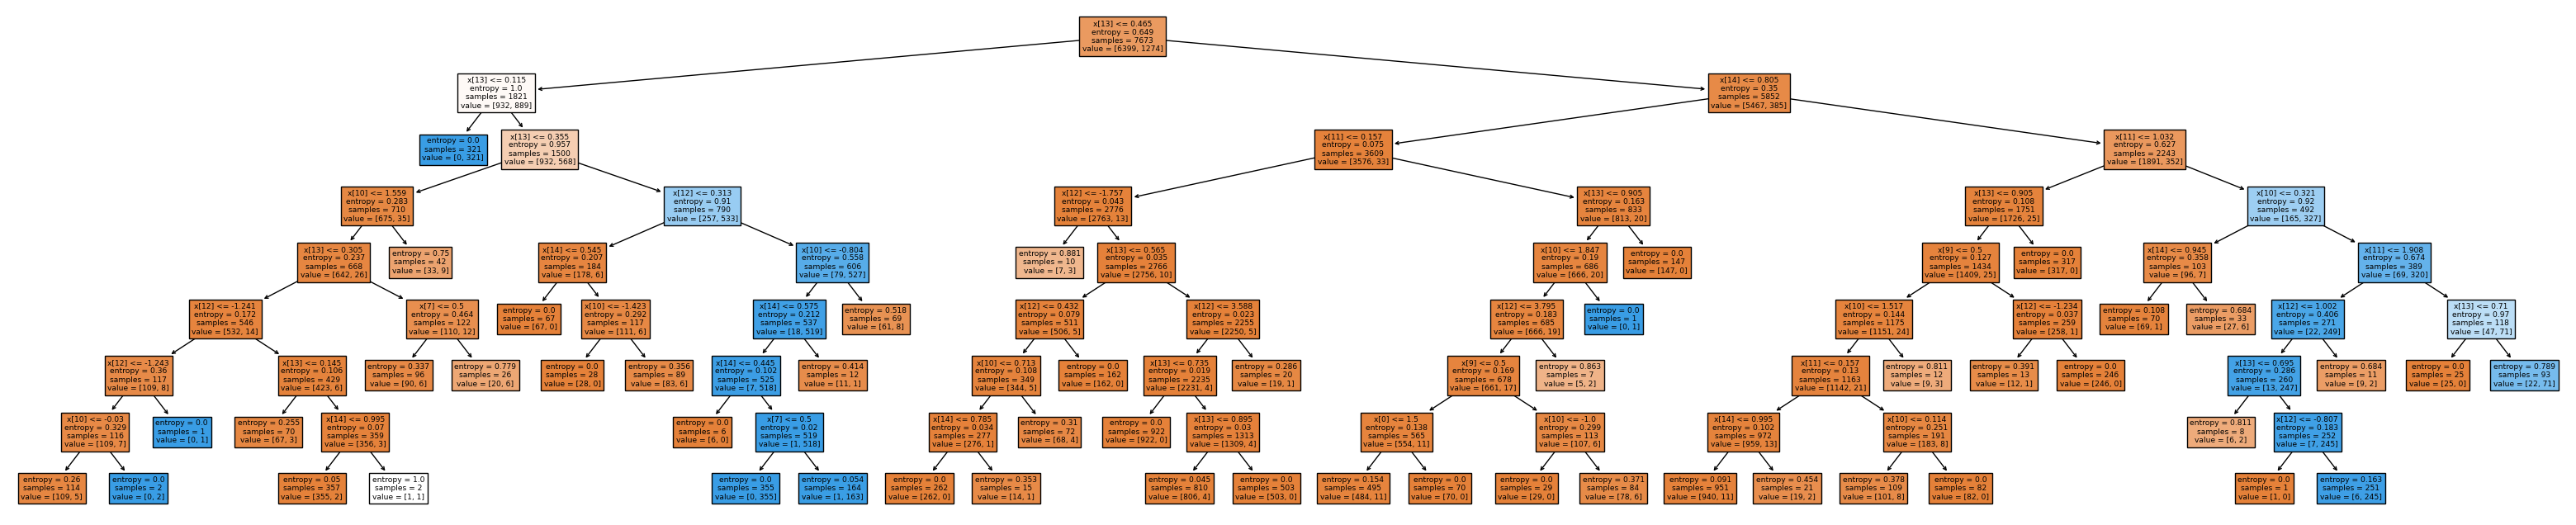

In [197]:
# Plotting full tree growth;
plt.figure(figsize=(40, 8))

plot_tree(dt.best_estimator_, filled=True)
plt.show();

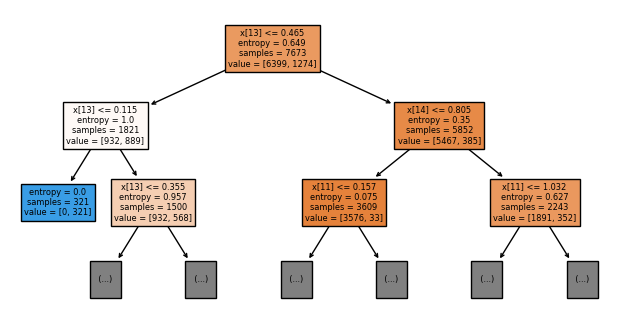

In [198]:
# Plotting the split details for tree;
plt.figure(figsize=(8, 4))

plot_tree(dt.best_estimator_, max_depth=2, filled=True)
plt.show();

In [199]:
# Storing predictions from model to 'dt_pred';
dt_pred = dt.predict(X_val)

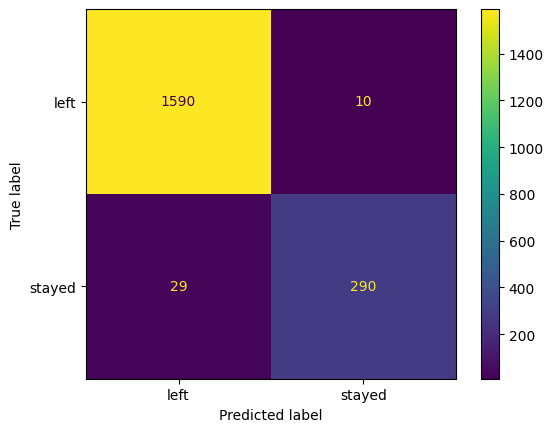

In [200]:

cm = confusion_matrix(y_val, dt_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=['left', 'stayed']) # type: ignore
disp.plot();

In [139]:
# Creating utility function to record test scores on devset;
def test_scores(model:str, y_true, y_pred):
    
    '''
    Returns the scores form the predictions
    made on test/dev-set.
    
    Parameters:
    
    model: The name of model.
    y_true: The true value of label.
    y_pred: Predictions from model.
    '''
    
    accuracy = metrics.accuracy_score(y_true, y_pred)
    precision = metrics.precision_score(y_true, y_pred)
    recall = metrics.recall_score(y_true, y_pred)
    f1 = metrics.f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)
    
    table = pd.DataFrame({
        'model': [model],
        'accuracy': [accuracy],
        'precision': [precision],
        'recall': [recall],
        'f1': [f1],
        'AUC': [auc]
    })
    
    return table

In [140]:
test_table = test_scores('Decision Tree Classifier', y_val, dt_pred)
test_table

,model,accuracy,precision,recall,f1,AUC
0,Decision Tree Classifier,0.979677,0.966667,0.909091,0.936995,0.95142


#### ***Ensembling Approach-Round I:***
#### **Bagging**: *Random Forest*

In [78]:
# Instantiating random forest classifier;
random_forest = RandomForestClassifier(random_state=42)

In [79]:
# Building/preparing parameter grids for cross-validation;
rf_parameters = {
    'n_estimators': [200, 400, 500],
    'max_samples': [0.25, 0.30, 0.5],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 8, None],
    'min_samples_split': [50, 100, 150],
    'max_features': [0.5, 0.7]
}

scores = ('recall', 'precision', 'accuracy', 'f1')

# Instantiating grid search for best parameters;
clf_rf = GridSearchCV(random_forest, param_grid=rf_parameters, scoring=scores, n_jobs=-1, verbose=1, cv=5, refit='f1')

In [80]:
%%time

# Fitting model on traing data;
# clf_rf.fit(X_train, y_tr)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
CPU times: total: 16.5 s
Wall time: 27min 55s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 8, None],
                         'max_features': [0.5, 0.7],
                         'max_samples': [0.25, 0.3, 0.5],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [200, 400, 500]},
             refit='f1', scoring=('recall', 'precision', 'accuracy', 'f1'),
             verbose=1)

In [92]:
# Saving Random Forest Classifier to binary file;
# dump_model(clf_rf, 'RandomForest')

In [93]:
# Loading Random Forest Classifier;
rf = load_model('RandomForest')

In [94]:
# Best score for the model;
print(rf.best_score_)

# Best parameters for Random Forest Classifier;
rf.best_estimator_

0.9443740668226145


RandomForestClassifier(max_features=0.7, max_samples=0.5, min_samples_split=50,
                       n_estimators=200, random_state=42)

In [254]:
# Storing predictions from model to 'rf_pred';
rf_pred = rf.predict(X_val)

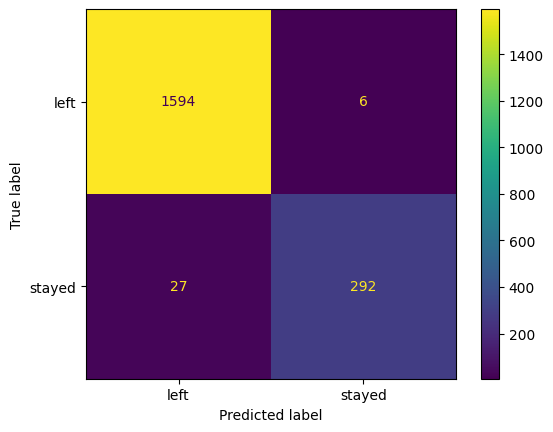

In [85]:
# Creating Confustion Matrix;
cm = confusion_matrix(y_val, rf_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=['left', 'stayed']) # type: ignore
disp.plot();

In [212]:
# test_table = pd.concat([test_table, test_scores('Random Forest Classifier', y_val, rf_pred)], axis=0).reset_index(drop=True)
test_table

,model,accuracy,precision,recall,f1,AUC
0,Decision Tree Classifier,0.979677,0.966667,0.909091,0.936995,0.951420
1,Random Forest Classifier,0.982804,0.979866,0.915361,0.946515,0.955805


### Developing model after taking into account **Data Leakage**

#### Post-Feature Engineering 

In [289]:
# Dropping Satisfaction level for preventing the data to be exact same;
x = x.drop('satisfaction_level', axis=1)

In [293]:
# Inspecting max and min average monthly hours values;
print('Max hours:', df['average_monthly_hours'].max())
print('Min hours:', df['average_monthly_hours'].min())

Max hours: 310
Min hours: 96


In [291]:
# Creating new column named 'OVERWORKED';
x['overworked'] = (x['average_monthly_hours'] > 176).astype(int)
x = x.drop('average_monthly_hours', axis=1)

In [173]:
# Splitting data into training, dev or validation, and test set; 
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)
x_tr_new, x_val_new, y_tr_new, y_val_new = train_test_split(x_train_new, y_train_new, test_size=0.2, stratify=y_train, random_state=42)
x_tr_new.head()

,last_evaluation,tenure,avg_hours_per_project,department,salary,overworked
10912,0.57,3,90.00,RandD,low,1
9242,0.62,2,54.00,marketing,medium,1
6818,0.92,3,35.25,sales,low,0
7239,0.99,3,46.00,IT,low,1
5691,0.75,3,37.25,technical,low,0


In [174]:
# Creating transformers to transform categorical variable in to numerical;
tnsf = ColumnTransformer(
    transformers=[
        ('sal_enc', OrdinalEncoder(categories=[['low', 'medium', 'high']]), [4]), # type: ignore
        ('dept_enc', OneHotEncoder(drop='first'), [3]),
        ('scale', StandardScaler(), [1, 2])
    ],
    remainder='passthrough'
)

In [175]:
# Instantiating pipelines to smoothen the workflow and transformations;
pipe_post = Pipeline([
    ('tnsf', tnsf)
])

pipe_post.fit(x_tr_new)

Pipeline(steps=[('tnsf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('sal_enc',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']]),
                                                  [4]),
                                                 ('dept_enc',
                                                  OneHotEncoder(drop='first'),
                                                  [3]),
                                                 ('scale', StandardScaler(),
                                                  [1, 2])]))])

In [176]:
X_train_new =pipe_post.transform(x_tr_new) 
X_val_new = pipe_post.transform(x_val_new)
X_test_new = pipe_post.transform(x_test_new)

#### ***Tree-Based Approach- Round II:***
#### *Decision Tree*

In [178]:
# Instantiating decision tree classifier;
decision_tree2 = DecisionTreeClassifier(random_state=42)

In [179]:
# Building/preparing parameter grids for cross-validation;
dt_parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 8, None],
    'min_samples_split': [50, 100, 150, 200],
    'max_features': [0.5, 0.7]
}

scores = ('recall', 'precision', 'accuracy', 'f1')

# Instantiating grid search for best parameters;
clf2 = GridSearchCV(decision_tree2, param_grid=dt_parameters, scoring=scores, n_jobs=-1, verbose=1, cv=10, refit='f1')

In [260]:
%%time

# Fitting model to training set;
clf2.fit(X_train_new, y_tr_new)

Fitting 10 folds for each of 80 candidates, totalling 800 fits
CPU times: total: 1.09 s
Wall time: 8.23 s


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 8, None],
                         'max_features': [0.5, 0.7],
                         'min_samples_split': [50, 100, 150, 200]},
             refit='f1', scoring=('recall', 'precision', 'accuracy', 'f1'),
             verbose=1)

In [182]:
# dump_model(clf2, 'DecisionTreeClassifier_2')

In [191]:
dt2 = load_model('DecisionTreeClassifier_2')

In [261]:
print(dt2.best_score_)
dt2.best_estimator_

0.8455884569669285


DecisionTreeClassifier(max_features=0.7, min_samples_split=50, random_state=42)

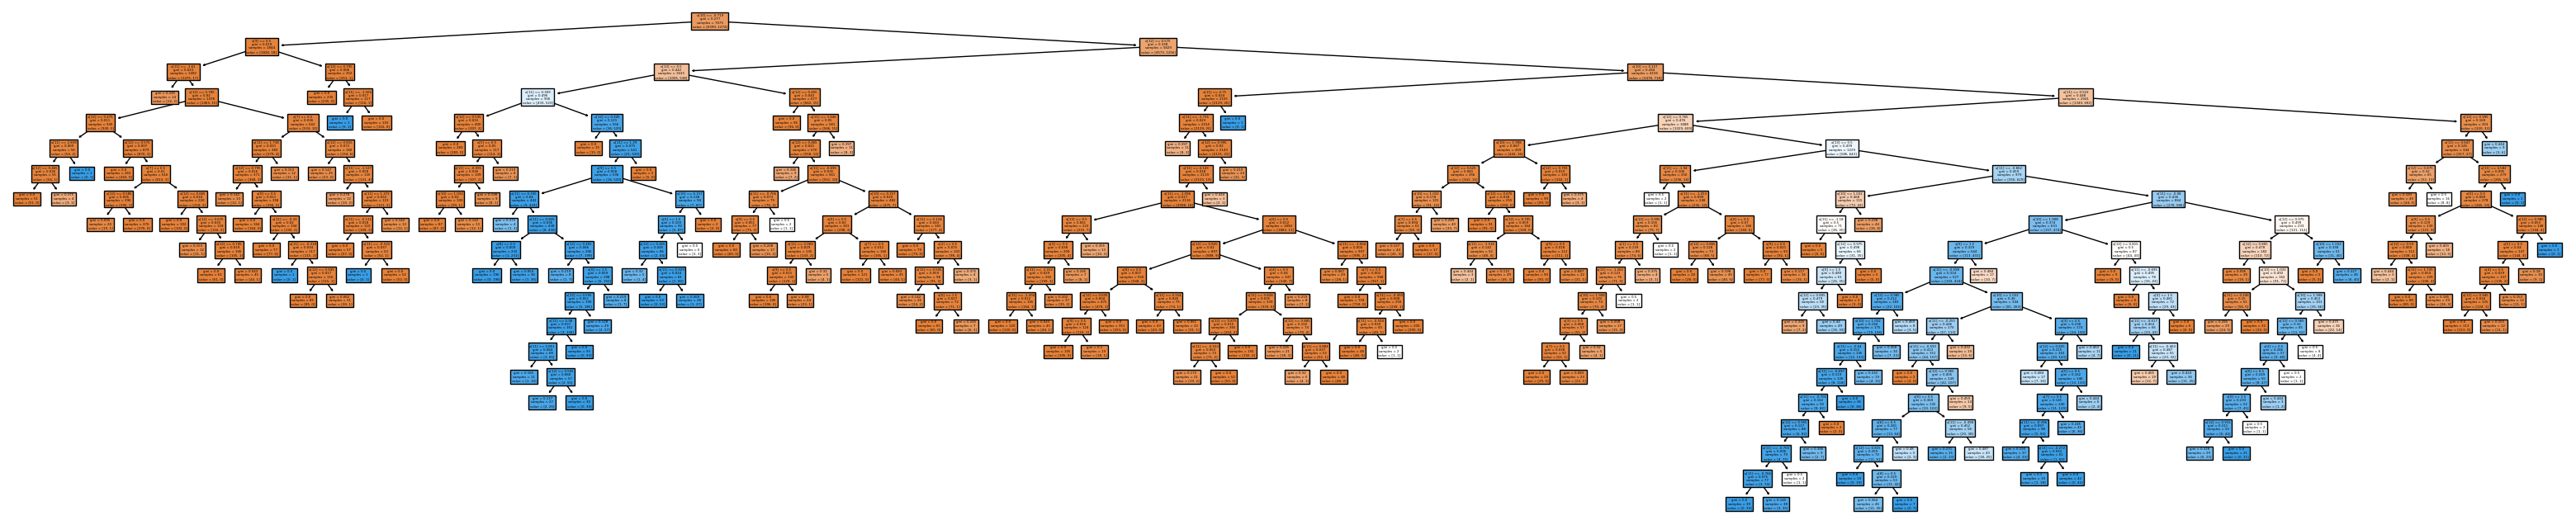

In [201]:
# Plotting full tree growth;
plt.figure(figsize=(40, 8))

plot_tree(dt2.best_estimator_, filled=True)
plt.show();

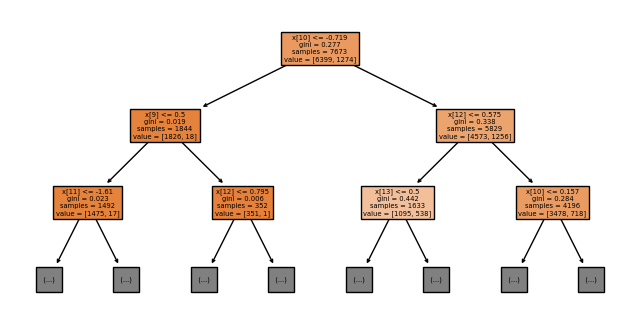

In [202]:
# Plotting the split details for tree;
plt.figure(figsize=(8, 4))

plot_tree(dt2.best_estimator_, max_depth=2, filled=True)
plt.show();

In [205]:
dt2_pred = dt2.predict(X_val_new)

In [209]:
def confusion_matrix_disp(y_true, y_pred, label=[0, 1]):
    
    '''
    The utility function returns the confusion matrix plot.
    
    Parameters:
    
    y_true: True values for labels.
    y_pred: Predicted values from model.
    labels: labels to be diplayed in the confusion matrix plot.
    '''
    
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=label)
    
    disp.plot();

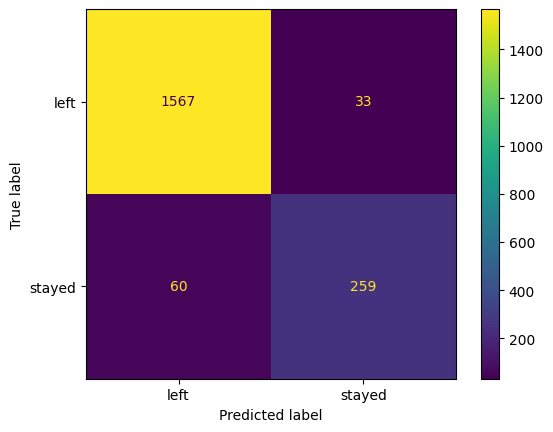

In [210]:
confusion_matrix_disp(y_val_new, dt2_pred, label=['left', 'stayed'])

In [223]:
# test_table = pd.concat([test_table, test_scores('DecisionTreeClassifier (II)', y_val_new, dt2_pred)], axis=0).reset_index(drop=True)
test_table

,model,accuracy,precision,recall,f1,AUC
0,Decision Tree Classifier,0.979677,0.966667,0.909091,0.936995,0.951420
1,Random Forest Classifier,0.982804,0.979866,0.915361,0.946515,0.955805
3,DecisionTreeClassifier (II),0.951537,0.886986,0.811912,0.847791,0.895644


#### ***Ensembling Approach-Round II:***
#### **Bagging**: *Random Forest*

In [255]:
# Instantiating Random Forest Classifier;
rf2 = RandomForestClassifier(random_state=42)

In [258]:
# Building/preparing parameter grids for cross-validation;
rf_parameters = {
    'n_estimators': [200, 400, 500],
    'max_samples': [0.25, 0.30, 0.5],
    'bootstrap': [True],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4, 6, 8, None],
    'min_samples_split': [50, 100, 150, 200],
    'max_features': [0.5, 0.7]
}

scores = ('recall', 'precision', 'accuracy', 'f1')

# Instantiating grid search for best parameters;
clf_rf2 = GridSearchCV(random_forest, param_grid=rf_parameters, scoring=scores, n_jobs=-1, verbose=1, cv=5, refit='f1')

In [265]:
%%time

# Fitting model to training dataset;
# clf_rf2.fit(X_train_new, y_tr_new)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


CPU times: total: 25.9 s
Wall time: 25min 54s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 6, 8, None],
                         'max_features': [0.5, 0.7],
                         'max_samples': [0.25, 0.3, 0.5],
                         'min_samples_split': [50, 100, 150, 200],
                         'n_estimators': [200, 400, 500]},
             refit='f1', scoring=('recall', 'precision', 'accuracy', 'f1'),
             verbose=1)

In [266]:
# Saving Random Forest Classifier to binary file;
# dump_model(clf_rf2, 'RandomForestClassifier_2')

In [267]:
# Loading Random Forest Classifier;
rf2 = load_model('RandomForestClassifier_2')

In [269]:
# Best score for the model;
print(rf2.best_score_)

# Best parameters for Random Forest Classifier;
rf2.best_estimator_

0.8537639394624847


RandomForestClassifier(criterion='entropy', max_features=0.5, max_samples=0.5,
                       min_samples_split=50, n_estimators=400, random_state=42)

In [274]:
# Storing predictions from model to 'rf2_pred';
rf2_pred = rf2.predict(X_val_new)

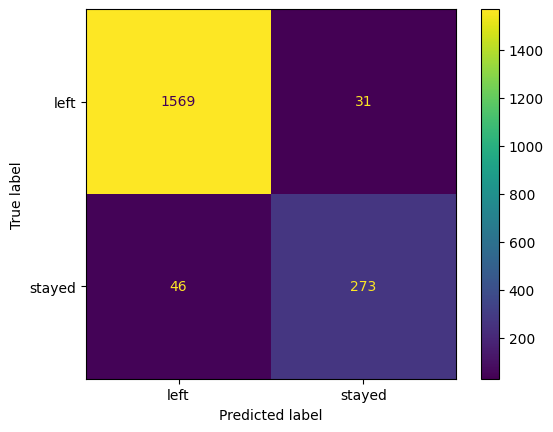

In [277]:
# Creating confusion matrix;
confusion_matrix_disp(y_val_new, rf2_pred, ['left', 'stayed'])

In [280]:
# Storing scores of model predictions on devset;
# test_table = pd.concat([test_table, test_scores('Random Forest Classifier (II)', y_val_new, rf2_pred)], axis=0)
test_table

,model,accuracy,precision,recall,f1,AUC
0,Decision Tree Classifier,0.979677,0.966667,0.909091,0.936995,0.951420
1,Random Forest Classifier,0.982804,0.979866,0.915361,0.946515,0.955805
3,DecisionTreeClassifier (II),0.951537,0.886986,0.811912,0.847791,0.895644
0,Random Forest Classifier (II),0.959875,0.898026,0.855799,0.876404,0.918212


# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

[Double-click to enter your summary here.]

### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]